In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst

### Uncomment below if you want to run on your modified code
#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/pyfeng')
import pyfeng as pf
np.set_printoptions(precision=4)

# Figure 1

In [3]:
### Make grid on sigma
iv = np.concatenate([10.**np.arange(-6,-2), np.arange(0.01, 5.001, 0.01)])[:,None]
#iv = np.arange(0.01, 5.0001, 0.002)[:,None]
kk = np.array([1., 2., 8.]); log_k = np.log(kk)

iv_i = np.sqrt(2*log_k); iv_i[iv_i==0.0] = 1e-64
p_i = pf.Bsm.price_std(iv_i, log_k, type=0)

p = pf.Bsm.price_std(iv, log_k, type=0)
pv = pf.Bsm.price_std(iv, log_k, type=1)
pv_i = pf.Bsm.price_std(iv_i, log_k, type=1)

pd = pf.Bsm.price_std(iv, log_k, type=2)
pd_i = pf.Bsm.price_std(iv_i, log_k, type=2)

vega = pf.Bsm.price_std(iv, log_k, type=-1)
d1 = -log_k/iv + 0.5*iv
d1_i = -log_k/iv_i + 0.5*iv_i

delta = N_d1 = spst.norm.cdf(d1)
delta_i = spst.norm.cdf(d1_i)
Nd2 = spst.norm.cdf(d1 - iv)

legend = [f'$e^k$={k1:0.1f}' for k1 in kk]

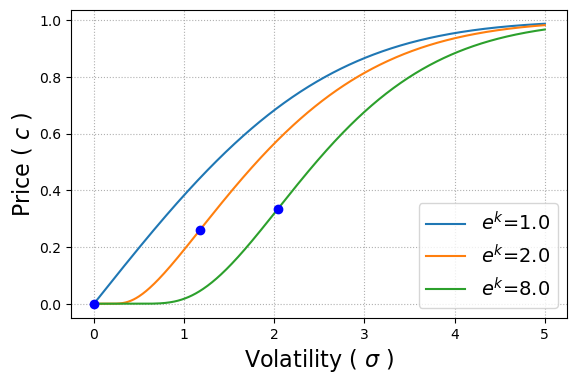

In [4]:
plt.figure(figsize=(6.4, 4))  # 6.4, 4.8 by default
plt.plot(iv, p)
plt.plot(iv_i, p_i, 'o', color='b')
plt.xlabel('Volatility ( $\\sigma$ )', fontsize=16)
plt.ylabel('Price ( $c$ )', fontsize=16)
plt.grid(linestyle=':')
plt.legend(legend, fontsize=14, loc=4)
#plt.savefig('price.png',bbox_inches='tight')
#plt.savefig('price.pdf',bbox_inches='tight')
plt.show()

C:\Users\jaehyuk\AppData\Local\Temp\ipykernel_21540\421235568.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(iv, np.log(p))


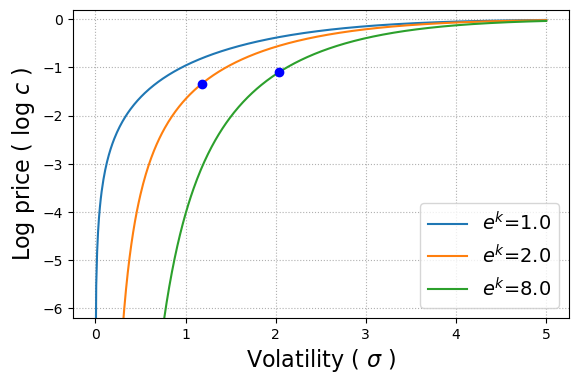

In [5]:
plt.figure(figsize=(6.4, 4))  # 6.4, 4.8 by default
plt.plot(iv, np.log(p))
plt.plot(iv_i, np.log(p_i), 'o', color='b')

plt.xlabel('Volatility ( $\\sigma$ )', fontsize=16)
plt.ylabel('Log price ( $\log\,c$ )', fontsize=16)
plt.grid(linestyle=':')
plt.ylim([-6.2, 0.2])
plt.legend(legend, fontsize=14, loc=4)
#plt.savefig('price_log.png',bbox_inches='tight')
#plt.savefig('price_log.pdf',bbox_inches='tight')
plt.show()

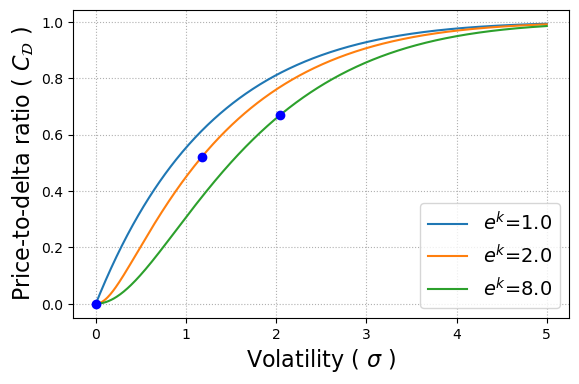

In [6]:
plt.figure(figsize=(6.4, 4))  # 6.4, 4.8 by default
plt.plot(iv, pd)
plt.plot(iv_i, pd_i, 'o', color='b')
plt.xlabel('Volatility ( $\\sigma$ )', fontsize=16)
plt.ylabel('Price-to-delta ratio ( $C_\mathcal{D}$ )', fontsize=16)
plt.grid(linestyle=':')
plt.legend(legend, fontsize=14, loc=4)
#plt.savefig('price_delta.png',bbox_inches='tight')
#plt.savefig('price_delta.pdf',bbox_inches='tight')
plt.show()

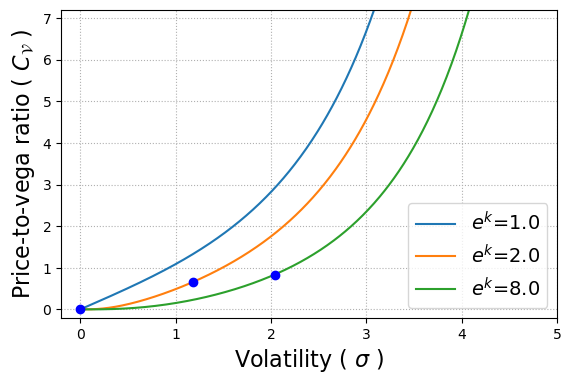

In [7]:
plt.figure(figsize=(6.4, 4))  # 6.4, 4.8 by default
plt.plot(iv, pv)
plt.plot(iv_i, pv_i, 'o', color='b')
plt.xlabel('Volatility ( $\\sigma$ )', fontsize=16)
plt.ylabel('Price-to-vega ratio ( $C_\mathcal{V}$ )', fontsize=16)
plt.grid(linestyle=':')
plt.ylim([-0.2, 7.2])
plt.xlim([-0.2, 5])
plt.legend(legend, fontsize=14, loc=4)
#plt.savefig('price_vega.png',bbox_inches='tight',)
#plt.savefig('price_vega.pdf',bbox_inches='tight')
plt.show()

# Figure 2

In [8]:
def iv_bounds(p, kk, sig=None):
    if sig is None:
        sig = pf.Bsm(1).impvol(p, kk, 1., 1.)
    else:
        sig = np.broadcast_to(sig, p.shape)
    
    log_k = np.log(kk)
    iv_l1 = 2*spst.norm.ppf((1+p)/2)
    iv_l2 = pf.Bsm.d1sigma(spst.norm.ppf(p), log_k)

    iv_i = np.sqrt(2*log_k)
    p_i = 0.5 - kk*spst.norm.cdf(-iv_i)
    
    iv_u1 = -2*spst.norm.ppf((1-p)/(1+kk))
    iv_u2 = spst.norm.ppf(p + kk*spst.norm.cdf(-iv_i)) + iv_i
    iv_u3 = spst.norm.ppf((1+p)/2) - spst.norm.ppf((1-p)/(2*kk))

    delta_u23 = np.fmin((1+p)/2, p + kk*spst.norm.cdf(-iv_i))
    iv_u23 = spst.norm.ppf(delta_u23) - spst.norm.ppf((delta_u23 - p)/kk)

    delta_l3 = p*(kk+p)/(2*p-1+kk)
    iv_l3 = pf.Bsm.d1sigma(spst.norm.ppf(delta_l3), log_k)
    
    pd = pf.Bsm.price_std(iv_u23, log_k, type=2)  # price-to-delta
    iv_lu23 = pf.Bsm.d1sigma(spst.norm.ppf(p/pd), log_k)

    ret = [
        (sig, '$\\sigma$', 'k', '-'),
        (iv_u1, '$U_1$', 'c', '-.'),
        (iv_u2, '$U_2$', 'r', ':'),
        (iv_u3, '$U_3$', 'r', '--'),
        (iv_u23, '$U_{23}$', 'r', '-.'),
        (iv_lu23, '$L_{U23}$', 'm', ':'),
        (iv_l1, '$L_1$', 'b', '-.'),
        (iv_l2, '$L_2$', 'k', ':'),
        (iv_l3, '$L_3$', 'g', '--'),
    ]
    return ret

## Figure 2 (Upper)

In [9]:
kk = 2  # 8
iv_i = np.sqrt(2*np.log(kk)); p_i = 0.5 - kk*spst.norm.cdf(-iv_i)
p = np.arange(1,1000)/1000
ret = iv_bounds(p, kk, sig=None)

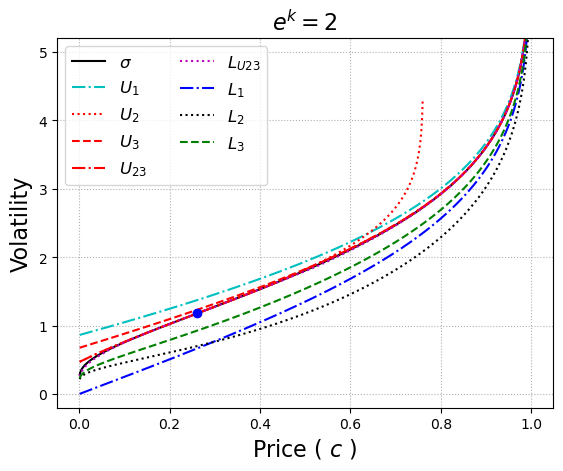

In [10]:
#plt.figure(figsize=(5, 4.5))
for (iv, lab, col, ls) in ret:
    #if lab.startswith('$\\sigma') or lab.startswith('$T'): #or lab.startswith('$\\sigma'):
    plt.plot(p, iv, color=col, linestyle=ls, label=lab)

plt.plot([p_i], [iv_i], 'o', color='b')
plt.title(f'$e^k=${kk}', fontsize=16)
ylabel = 'Price ( $c$ )'
plt.xlabel(ylabel, fontsize=16)
plt.ylabel('Volatility', fontsize=16)
plt.legend(fontsize=12, ncol=2)
plt.grid(linestyle=':')
file = 'bound'
plt.ylim([-0.2, 5.2])
#plt.savefig(f'{file}_k{strike}.png',bbox_inches='tight')
#plt.savefig(f'{file}_k{strike}.pdf',bbox_inches='tight')
plt.show()

## Figure 2 (Lower)

In [11]:
kk = 2  # 8
iv_i = np.sqrt(2*np.log(kk))
p_i = 0.5 - kk*spst.norm.cdf(-iv_i)
U1_infl = 2*spst.norm.ppf((1.5 - kk*spst.norm.cdf(-iv_i))/2)
iv_l1 = np.arange(1,8, 0.02)
p = spst.norm.cdf(iv_l1/2)*2 - 1.
ret = iv_bounds(p, kk, sig=None)

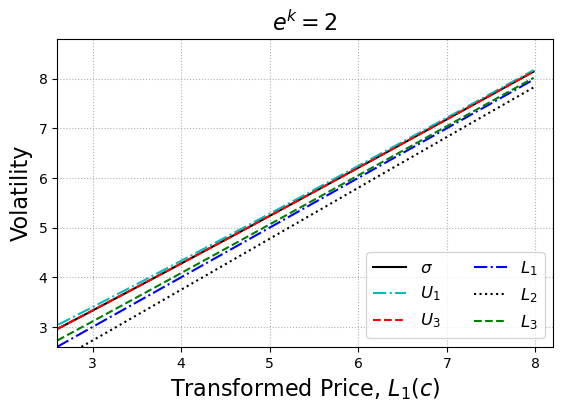

In [12]:
plt.figure(figsize=(6.4, 4))  # 6.4, 4.8 by default
for (iv, lab, col, ls) in ret:
    if lab in ('$U_1$', '$U_3$', '$\\sigma$', '$L_1$', '$L_2$', '$L_3$', '$L_3\'$', '$L_4$', '$T_{A2}$'):
        plt.plot(iv_l1, iv, color=col, linestyle=ls, label=lab)

plt.title(f'$e^k=${kk}', fontsize=16)
plabel = 'Transformed Price, $L_1(c)$'
vlabel = 'Volatility'
plt.xlabel(plabel, fontsize=16)
plt.ylabel(vlabel, fontsize=16)
plt.legend(fontsize=12, ncol=2, loc=4)
plt.grid(linestyle=':')
file = 'bound_U1'
plt.ylim([2.6, 8.8])
plt.xlim([2.6, 8.2])
#plt.savefig(f'{file}_k{strike}.png',bbox_inches='tight')
#plt.savefig(f'{file}_k{strike}.pdf',bbox_inches='tight')
plt.show()

# Figure 3

In [13]:
sig = 0.2  # 1.5
log_k = np.arange(0., 3*sig, 0.001)
kk = np.exp(log_k)
p = pf.Bsm.price_std(sig, log_k, type=0)

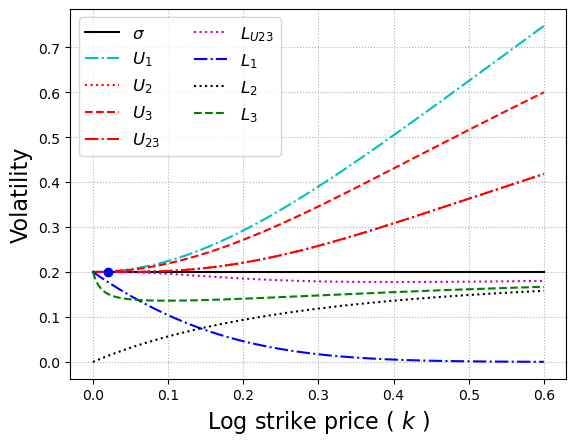

In [14]:
ret = iv_bounds(p, kk, sig=sig)

for (iv, lab, col, ls) in ret:
    plt.plot(log_k, iv, color=col, linestyle=ls, label=lab)
plt.plot([sig**2/2], [sig], 'o', color='b')

plt.xlabel('Log strike price ( $k$ )', fontsize=16)
plt.ylabel('Volatility', fontsize=16)
plt.legend(fontsize=12,ncol=2)
plt.grid(linestyle=':')
#plt.savefig(f'bound_sigma{int(sig*100)}.png',bbox_inches='tight')
#plt.savefig(f'bound_sigma{int(sig*100)}.pdf',bbox_inches='tight')
plt.show()

# 3. Applications to numerical root-nding of implied volatility

In [15]:
def iv_nr_naive(price, kk, n_iter=3, verbose=False):
    log_k, p = np.broadcast_arrays(np.log(kk), price)
    iv = np.full_like(p, np.sqrt(2*log_k))

    for k in range(n_iter+1):
        pv = pf.Bsm.price_std(iv, log_k, type=1)  # price-to-vega
        vega = pf.Bsm.price_std(iv, log_k, type=-1)
        p_err = pv*vega - p

        if verbose:
            with np.errstate(divide="ignore"):
                idx = np.unravel_index(np.argmax(np.abs(p_err)), p_err.shape)
                p_err_max = p_err[idx]
                p_log_err_max = np.log(pv[idx]*vega[idx]/p[idx])
                print(f"Iter={k:02d}: P={p[idx]:0.3g} Ln_K={log_k[idx]:0.3g} iv={iv[idx]:0.4g} LogErr={p_log_err_max:0.4g} Err={p_err_max:0.4g}")

        if(k<n_iter):
            iv -= pv - price/vega
    return iv

def iv_nr_log(price, kk, n_iter=3, verbose=False):

    log_k, p = np.broadcast_arrays(np.log(kk), price)
    log_p_2pi = 0.5*np.log(2*np.pi) + np.log(p)

    iv = np.where((log_k==0.) & (p<1e-4),
                    np.sqrt(2.*np.pi)*p*(1.0 + np.pi*p**2/12.),
                    pf.Bsm.d1sigma(spst.norm._ppf(p*(kk+p)/(2*p+(kk-1.))), log_k)
                    )

    for k in range(n_iter+1):
        pv = pf.Bsm.price_std(iv, log_k, type=1)  # price-to-vega
        d1 = -log_k/iv + iv/2.
        p_log_err = -d1**2/2. + np.log(pv) - log_p_2pi

        if verbose:
            with np.errstate(divide="ignore"):
                idx = np.unravel_index(np.argmax(np.abs(p_log_err)), p_log_err.shape)
                p_log_err_max = p_log_err[idx]
                p_err_max = np.expm1(p_log_err_max)*p[idx]
                print(f"Iter={k:02d}: P={p[idx]:0.3g} Ln_K={log_k[idx]:0.3g} iv={iv[idx]:0.4g} LogErr={p_log_err_max:0.4g} Err={p_err_max:0.4g}")

        if(k<n_iter):
            iv -= p_log_err*pv
    return iv

In [16]:
kk_ = np.exp(np.hstack([0., np.power(10., np.arange(-10,-2)), np.arange(0.01, 10.0001, 0.01)]))  # strike
p_ = np.hstack([np.power(10., np.arange(-40,-4)), np.arange(1, 10000)/10000])
p, kk = np.broadcast_arrays(p_[:, None], kk_)

In [17]:
iv = iv_nr_naive(p, kk, n_iter=5, verbose=True)

Iter=00: P=1 Ln_K=0 iv=0 LogErr=-inf Err=-0.9999
Iter=01: P=1 Ln_K=0 iv=2.506 LogErr=-0.2358 Err=-0.21
Iter=02: P=1 Ln_K=0 iv=3.661 LogErr=-0.06944 Err=-0.06708
Iter=03: P=1 Ln_K=0 iv=4.559 LogErr=-0.0228 Err=-0.02254
Iter=04: P=1 Ln_K=0 iv=5.318 LogErr=-0.007768 Err=-0.007737
Iter=05: P=1 Ln_K=0 iv=5.983 LogErr=-0.002679 Err=-0.002675


In [18]:
iv = iv_nr_log(p, kk, n_iter=5, verbose=True)

Iter=00: P=1e-40 Ln_K=0.02 iv=0.001537 LogErr=-5.134 Err=-9.941e-41
Iter=01: P=1e-14 Ln_K=1e-10 iv=3.135e-11 LogErr=-0.5056 Err=-3.968e-15
Iter=02: P=1e-12 Ln_K=1e-10 iv=5.759e-11 LogErr=-0.03733 Err=-3.664e-14
Iter=03: P=0.0003 Ln_K=0.01 iv=0.007379 LogErr=-0.0003368 Err=-1.01e-07
Iter=04: P=0.0005 Ln_K=0.01 iv=0.008486 LogErr=-3.216e-08 Err=-1.608e-11
Iter=05: P=0.0005 Ln_K=0 iv=0.001253 LogErr=1.986e-12 Err=9.93e-16


# Figure 4

In [19]:
p = np.arange(1, 1000)/1000
kk = 8  # 2
bsm = pf.Bsm(1.); bsm.IMPVOL_TOL = 1e-15
iv = bsm.impvol(p, kk, 1., 1.)
#iv = iv_nr_log(p, kk, n_iter=10, verbose=False)

C:\Github/pyfeng\pyfeng\bsm.py:413: Warning: impvol_newton did not converged within 7 iterations: max log error = 4.440892098500626e-15
  warnings.warn(warn_msg, Warning)


C:\Users\jaehyuk\AppData\Local\Temp\ipykernel_21540\3278207605.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot((p), np.log10(np.abs(iv_2-iv)), 'g--')
C:\Users\jaehyuk\AppData\Local\Temp\ipykernel_21540\3278207605.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot((p), np.log10(np.abs(iv_3-iv)), 'k:')
C:\Users\jaehyuk\AppData\Local\Temp\ipykernel_21540\3278207605.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.plot((p), np.log10(np.abs(iv_4-iv)), 'b-.')


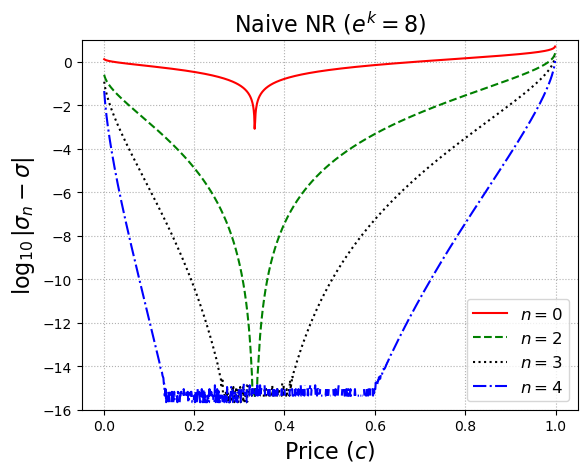

In [20]:
iv_0 = iv_nr_naive(p, kk, n_iter=0)
iv_2 = iv_nr_naive(p, kk, n_iter=2)
iv_3 = iv_nr_naive(p, kk, n_iter=3)
iv_4 = iv_nr_naive(p, kk, n_iter=4)

plt.plot((p), np.log10(np.abs(iv_0-iv)), 'r-')
plt.plot((p), np.log10(np.abs(iv_2-iv)), 'g--')
plt.plot((p), np.log10(np.abs(iv_3-iv)), 'k:')
plt.plot((p), np.log10(np.abs(iv_4-iv)), 'b-.')
plt.ylim([-16,1])
plt.title(f'Naive NR ($e^k=${kk})', fontsize=16)
plt.xlabel('Price ($c$)', fontsize=16)
plt.ylabel(r'$\log_{10}|\sigma_n-\sigma|$', fontsize=16)
plt.legend(['$n=0$', '$n=2$', '$n=3$', '$n=4$'], fontsize=12)
plt.grid(linestyle=':')

#plt.savefig(f'convergence_naive_k{kk}.png',bbox_inches='tight')
#plt.savefig(f'convergence_naive_k{kk}.pdf',bbox_inches='tight')

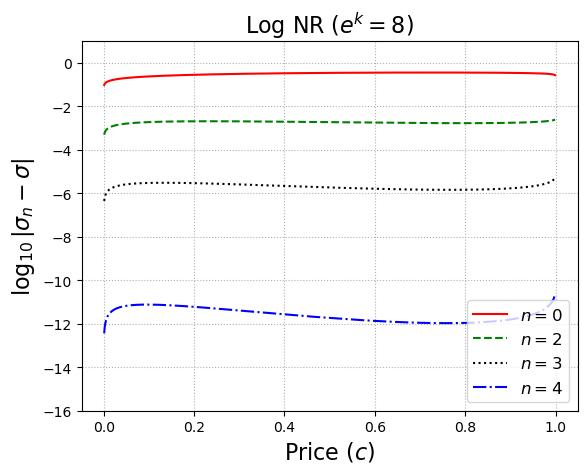

In [21]:
iv_0 = iv_nr_log(p, kk, n_iter=0, verbose=False)
iv_2 = iv_nr_log(p, kk, n_iter=2, verbose=False)
iv_3 = iv_nr_log(p, kk, n_iter=3, verbose=False)
iv_4 = iv_nr_log(p, kk, n_iter=4, verbose=False)

plt.plot((p), np.log10(np.abs(iv_0-iv)), 'r-')
plt.plot((p), np.log10(np.abs(iv_2-iv)), 'g--')
plt.plot((p), np.log10(np.abs(iv_3-iv)), 'k:')
plt.plot((p), np.log10(np.abs(iv_4-iv)), 'b-.')
plt.ylim([-16,1])
plt.title(f'Log NR ($e^k=${kk})', fontsize=16)
plt.xlabel('Price ($c$)', fontsize=16)
plt.ylabel(r'$\log_{10}|\sigma_n-\sigma|$', fontsize=16)
plt.legend(['$n=0$', '$n=2$', '$n=3$', '$n=4$'], fontsize=12)
plt.grid(linestyle=':')

#plt.savefig(f'convergence_log_k{kk}.png',bbox_inches='tight')
#plt.savefig(f'convergence_log_k{kk}.pdf',bbox_inches='tight')